#### Decision Tree Regression is a part of CART (Classification & Regression Trees)

In [1]:
from IPython.display import Image
from IPython.display import YouTubeVideo 

In [13]:
# Decision Tree Regression splits up the data into several segments and then constructs nodes at the boundaries
# of those segments, which check for a condition and after going through these nodes, we arrive at a decision node, also 
# known as terminal nodes or leaf. How & where these splits are conducted is determined by the algorithm by using the 
# Information Entropy(IE). In Regression Trees, the leaf is a numeric value, since regression predicts a continous variable.
# I.E helps the algorithm to know if a particular split helps in increasing the information of the data, does it add some 
# value to the way we want to group our points. And it sets a minimum threshold, that if a split helps in increasing the 
# information about the data, and if that amount of increase in the information (due to a particular split) is above the 
# minimum threshold, only then, 
# the split will take place. It stops splitting the data simply when the amount of information added by any split cannot
# meet the minimum threshold or the remaining points cannot be split further, say 5% of the whole data.

In [14]:
# article for Information Theory and Entropy
# https://machinelearningmastery.com/what-is-information-entropy/

# sklearn user-guide for decision trees, pretty interesting unlike other docs :-
# https://scikit-learn.org/stable/modules/tree.html#tree

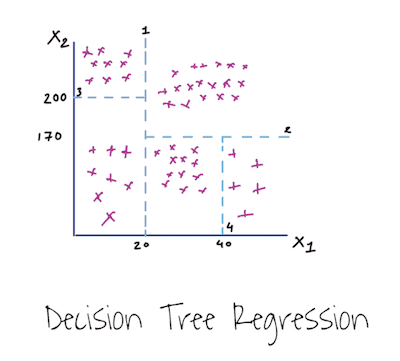

In [6]:
#Example of splitting of 3 dimensional data (Y/target variable is not plotted for sake of simplicity, only features X1 & X2)
Image('CAPTURE2.png', width=600, height=450, embed=True)

In [8]:
# And after the splitting has been done, we predict the target using the averages of the data in
# the segments that we split. If the test data-point falls into any of the segments, the Tree simply predicts the average 
# of Y for that segment as the prediction of the data point. (pretty dull & ineffecitve regression algorithm ig..)
# therefore, each leaf corresponds to an average value of D.V in a different cluster of observations

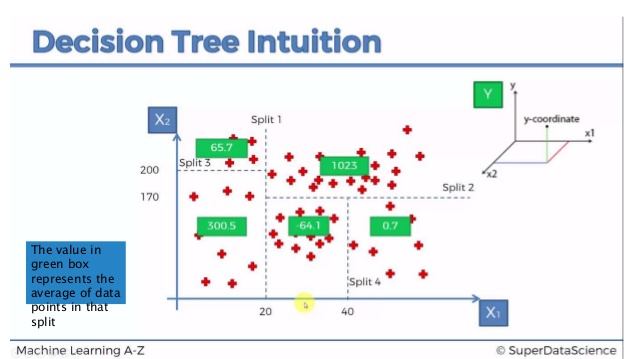

In [12]:
Image('CAPTURE3.PNG', width=700, height=550, embed=True)
# The value in the green boxes represents the average of the Y (D.V) for the corresponding data points in that split.

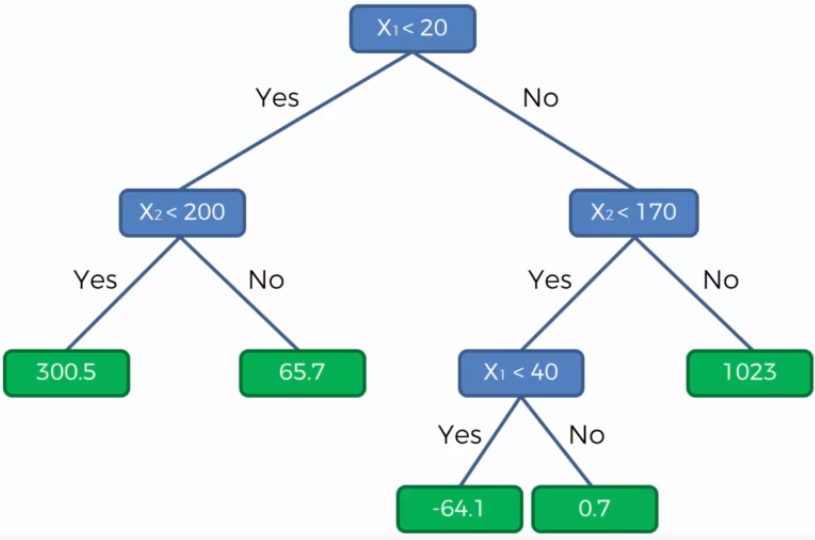

In [3]:
Image('CAPTURE.png', width=600, height=450, embed=True)

In [3]:
# What if we provide the regression tree with a data point that is outside the range of the training data, 
# say (x1,x2) = (100,260)... What would it do?
# ig it will predict the extreme most leaf which would be inaccurate. So according to my intelligence 
# (which paralle's that of Einstein's :} ), regression trees cannot extrapolate or interpolate like other regression models
# can, such as Simple & Multiple Linear Regression, Support Vector Regression etc.

In [ ]:
# Decision tree is helpful where you have a lot of features, since we could predict the D.V just by looking at a scatter 
# plot if there were only 1 or 2 features. But visualising higher dimensional data is not an option in this era. Hence, 
# decision trees to the rescue.

### How Decision Trees determine which split to make

In [15]:
#Squared Residuals come into play here as well. The tree starts with a few observation (*) and makes a split (i.e creates a 
# node) and calculates the SSR based on that threshold (node). And it does this iteratively to calculate the next node using
# the next few observations, and it makes predictions and again calculates the SSR. It does this for every set of few data
# points in the training set. Hence we get a bunch of SSR values corresponding to different nodes/splits which can be 
# plotted on a scatter plot. Then we choose the node which has least SSR. In summary we split the data into 2 groups by
# finding the threshold that gave us the smallest SSR.

# This was only for one node, we then move forward and do this process again for the split data. But when do we stop? In 
# order to prevent over-fitting, we usually stop splitting if there are less than 20 observations in a segment. We can vary 
# it as per out liking. Although there is another way to prevent over-fitting ig.. the one discussed in above paragraph, 
# where we stop when the split cannot add the minimum threshold amount of info to our model.. idk, something like that.

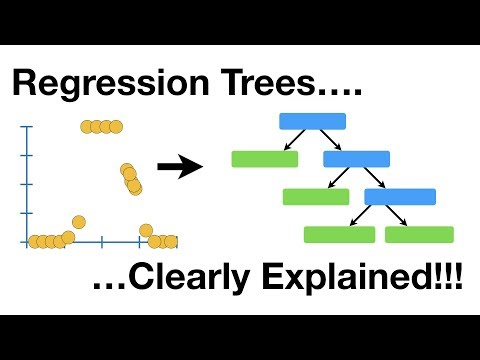

In [2]:
YouTubeVideo('g9c66TUylZ4', width=850, height=500)

In [10]:
# There is also the concept of pruning trees, but let's save that for later

In [3]:
# (*) The batch size of observations used for determining a split based on their average, also affects the model. In 
# the above video, Josh took only 2 observations as the batch size to inititate a split, we could use, 3,4,5 or 10, whatever
# but it will have consequences. Try it out yourself.

In [15]:
# NOTEBOOK ON POLYNOMIAL REGRESSION V/S REGRESSION TREES. try to find dataset with only 2 features (easier to visualize) 
# CUSTOM REGRESSION TREE 

## CODE

In [18]:
# basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# feature encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# train test split
from sklearn.model_selection import train_test_split

# train and plot tree
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('50_Startups.csv')
df.head()

R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94

In [3]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [4]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(drop='first'), [3])], remainder='passthrough')
X = ct.fit_transform(X)

In [5]:
X[:5, :]

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [16]:
tree = DTR(min_samples_split=7, min_samples_leaf=5)
tree.fit(X_train, Y_train)

DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=7)

In [27]:
tree.score(X_test, Y_test)

0.8928910504780355

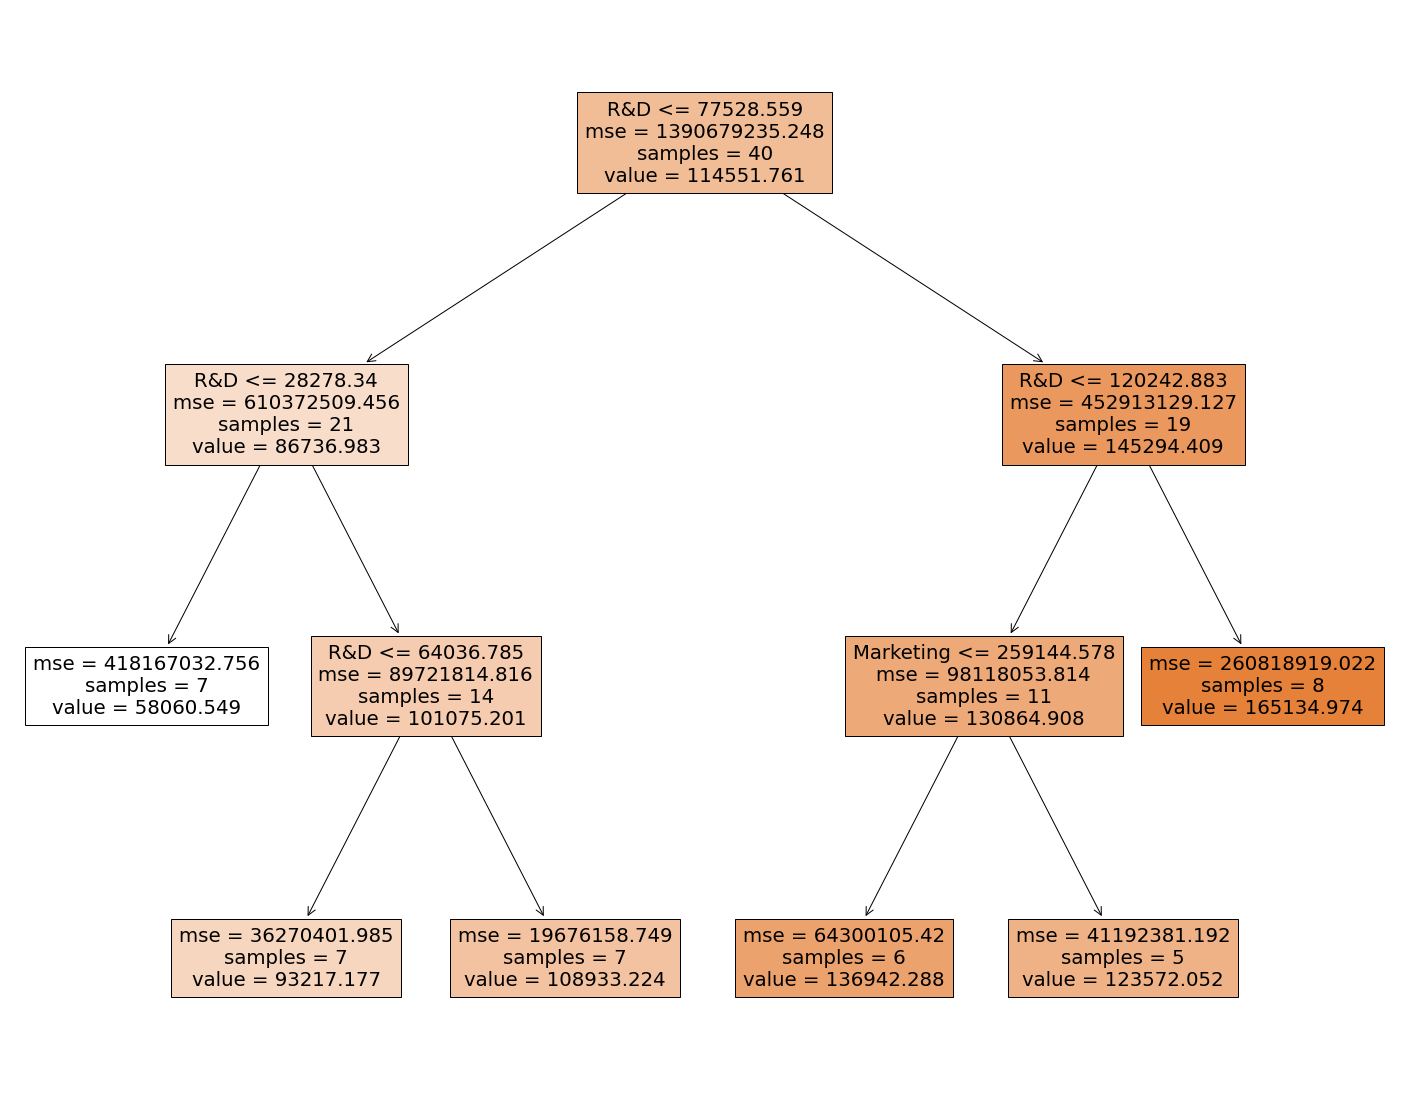

In [37]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree,
              feature_names=['NY', 'Flr', 'R&D','Admin','Marketing'],
              class_names = ['Profit'],
              filled=True)

In [36]:
for x in tree.feature_importances_: print(x)

0.0
0.0
0.9901765976125012
0.0
0.009823402387498811


In [19]:
df.corr()

R&D Spend  Administration  Marketing Spend    Profit
R&D Spend         1.000000        0.241955         0.724248  0.972900
Administration    0.241955        1.000000        -0.032154  0.200717
Marketing Spend   0.724248       -0.032154         1.000000  0.747766
Profit            0.972900        0.200717         0.747766  1.000000

In [39]:
# I understand why the tree isn't using the admin feature bcoz of the low correlation with profit, but what about 'state'?
# Maybe the reason is impurity thing, since the impurity of splitting on 'State' might be too high, the algorithm never 
# splits on that feature.

### Let's try out implementing the DTR only with 'Marketing Spend' and 'R&D Spend' from the beginning. Visualizing would be easier with only 2 features, maybe that would provide more insight into DTR.

In [41]:
# RESTART NOTEBOOK

In [2]:
df = pd.read_csv('50_Startups.csv', usecols=['R&D Spend','Marketing Spend','Profit'])
df.head()

R&D Spend  Marketing Spend     Profit
0  165349.20        471784.10  192261.83
1  162597.70        443898.53  191792.06
2  153441.51        407934.54  191050.39
3  144372.41        383199.62  182901.99
4  142107.34        366168.42  166187.94

In [3]:
%matplotlib notebook

<IPython.core.display.Javascript object>


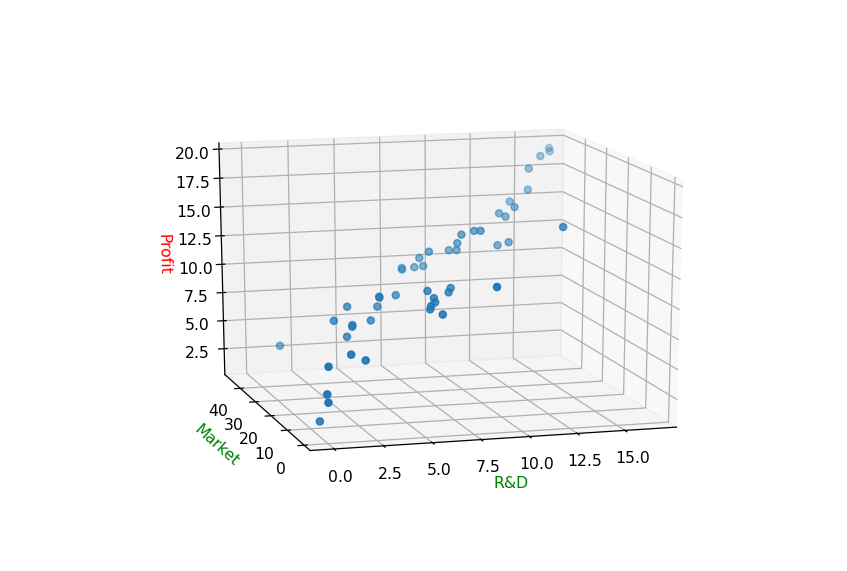

In [4]:
# 3D interactive scatter plot
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter3D(df['R&D Spend']/10000, df['Marketing Spend']/10000, df.Profit/10000)
ax.set_xlabel('R&D', c='green')
ax.set_ylabel('Market',c='green')
ax.set_zlabel('Profit', c='red')
plt.show()

<IPython.core.display.Javascript object>


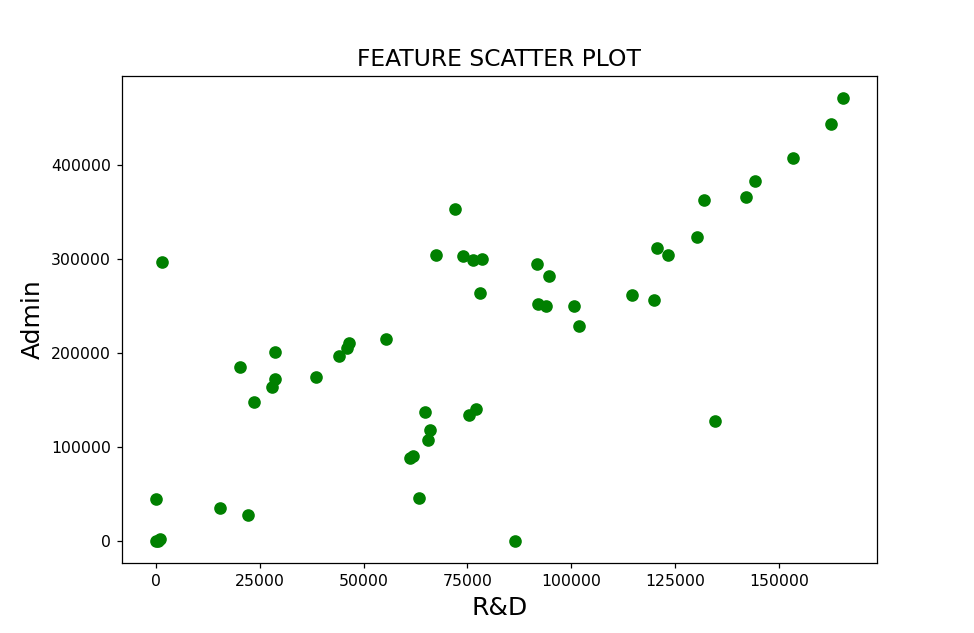

In [5]:
# feature space
plt.scatter(df['R&D Spend'],df['Marketing Spend'], color='green', s=50)
plt.xlabel('R&D', fontsize=16)
plt.ylabel('Admin', fontsize=16)
plt.title('Feature Scatter Plot'.upper(), fontsize=15)
plt.show()

In [6]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [7]:
# split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
# train
tree = DTR(min_samples_split=7, min_samples_leaf=5)
tree.fit(X_train, Y_train)

DecisionTreeRegressor(min_samples_leaf=5, min_samples_split=7)

In [9]:
tree.score(X_test, Y_test)  # same as previous tree, obvious

0.8928910504780356

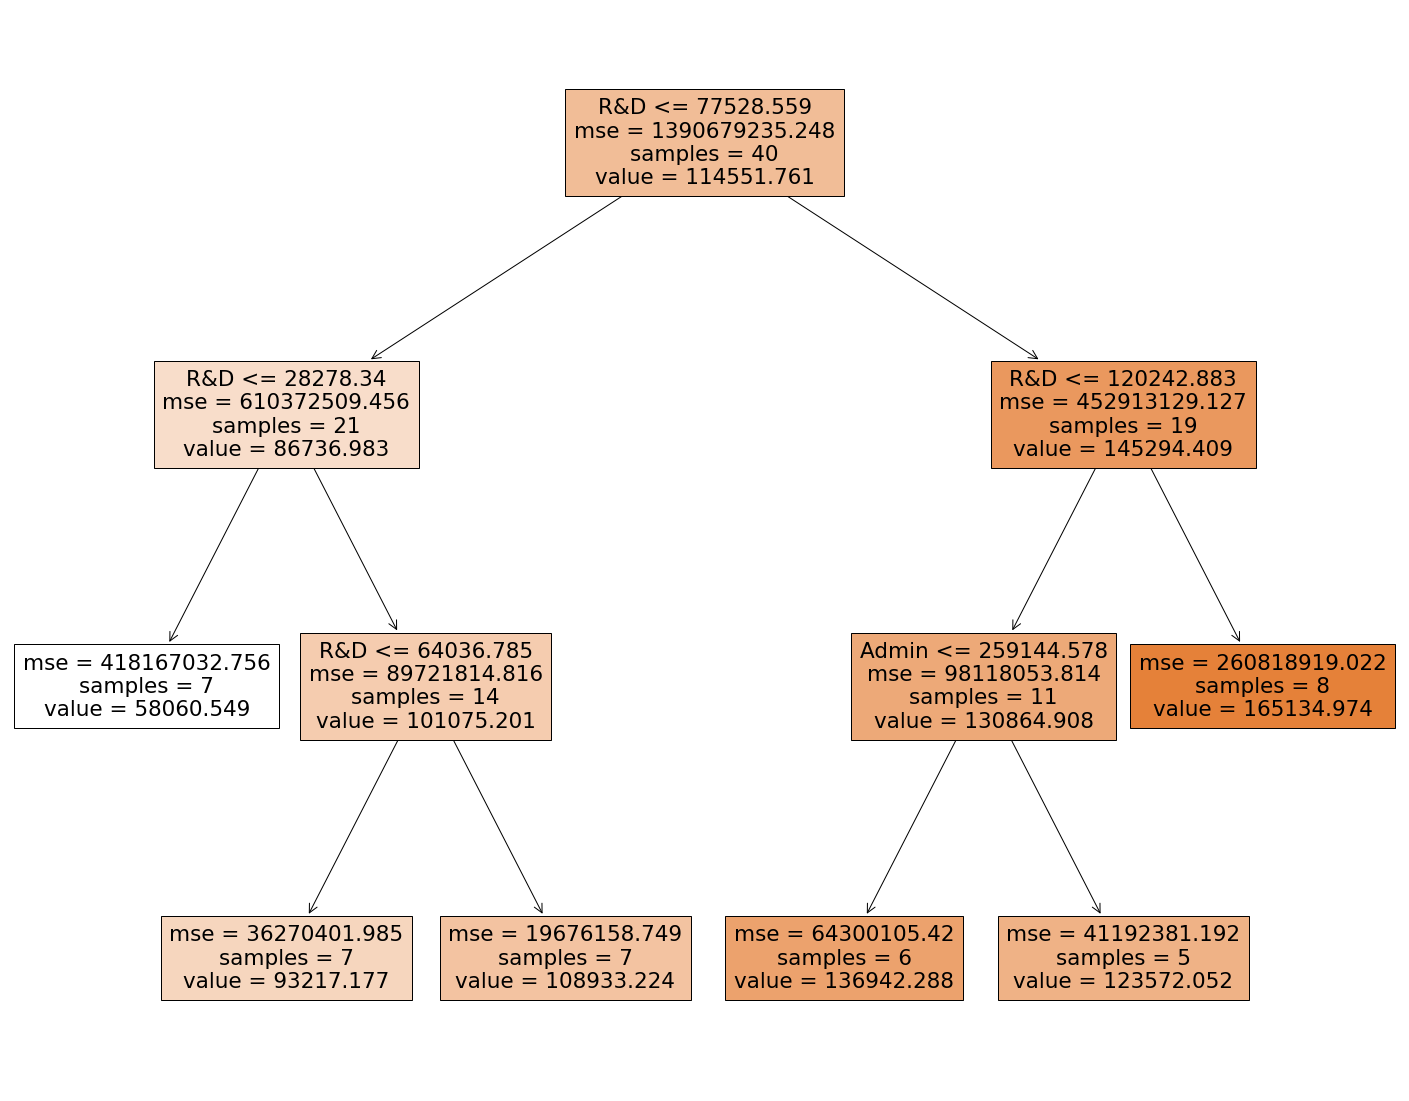

In [12]:
%matplotlib inline
fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree,
              feature_names=['R&D','Admin'],
              class_names='Profit',
              filled=True)

In [13]:
%matplotlib notebook

<IPython.core.display.Javascript object>


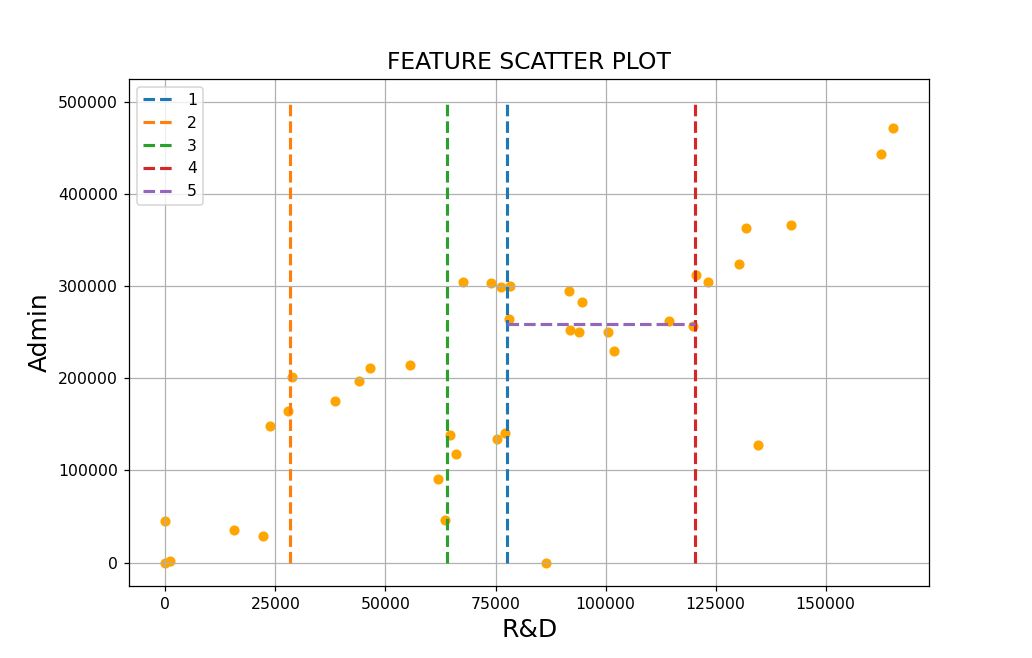

In [19]:
plt.scatter(X_train[:, 0],X_train[:, 1], color='orange', s=30)
# splits made by the tree
plt.plot([77528,77528],[0,500000], linestyle='dashed', label='1', lw=2)
plt.plot([28278,28278],[0,500000], linestyle='dashed', label='2', lw=2)
plt.plot([64036,64036],[0,500000], linestyle='dashed', label='3', lw=2)
plt.plot([120242,120242],[0,500000], linestyle='dashed', label='4', lw=2)
plt.plot([77528,120242],[259144,259144], linestyle='dashed', label='5', lw=2)

plt.xlabel('R&D', fontsize=16)
plt.ylabel('Admin', fontsize=16)
plt.title('FEATURE SCATTER PLOT', fontsize=15)
plt.legend()
plt.grid()
plt.show()

In [17]:
tree.predict([[72000,400000]])

array([108933.22428571])

#### Important hyper-parameters to understand that can significantly change the decision tree:
#### 1. max_depth
#### 2. min_samplt_split
#### 3. min_samplt_leaf
#### 4. the number of observations initially considered when trying to figure out the best possible split. 
The batch size of observations used for determining a split based on their average, also affects the model. In 
the video, Josh took only 2 observations as the batch size, took their average, made the split and predicted based on that average and then calculated SSR. The algorithm does this repeatedly in order to find the split that decreases the most impurity in the child node or the split that gives us the least SSR. we could use, 3,4,5 or 10 instead of 2, but it will have consequences. 

In [1]:
# All-in-one brief article on hyperparameter tuning of decision trees:
# https://towardsdatascience.com/how-to-tune-a-decision-tree-f03721801680

### hyper-parameter no. - 4
#### Let's call this hyper parameter n_obs_split for ease of reference in the future. I'd like to find out how does the change in this parameter affect the model. Let's analyse this parameter in a new notebook